# Importing Library

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Exploratory Data Analysis(EDA)

In [143]:
df = pd.read_csv('hour.csv')

In [144]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [145]:
#renaming columns
df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [146]:
df.shape

(17379, 17)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [148]:
df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [149]:
df.describe()

,rec_id,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [150]:
# checking duplicates

duplicate = df.duplicated()
df = df.drop_duplicates(subset=['datetime', 'hour'])
df[df.duplicated(['datetime', 'hour'])]
print(duplicate.sum())

0


In [151]:
df.dtypes

rec_id                 int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
holiday                int64
weekday                int64
workingday             int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object

In [152]:
# categorical variables
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['workingday'] = df.workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [153]:
df['datetime'] = df.hour.astype('float')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rec_id             17379 non-null  int64   
 1   datetime           17379 non-null  float64 
 2   season             17379 non-null  category
 3   year               17379 non-null  category
 4   month              17379 non-null  category
 5   hour               17379 non-null  category
 6   holiday            17379 non-null  category
 7   weekday            17379 non-null  category
 8   workingday         17379 non-null  category
 9   weather_condition  17379 non-null  category
 10  temp               17379 non-null  float64 
 11  atemp              17379 non-null  float64 
 12  humidity           17379 non-null  float64 
 13  windspeed          17379 non-null  float64 
 14  casual             17379 non-null  int64   
 15  registered         17379 non-null  int64   
 16  tota

In [155]:
# weather_condition
df.weather_condition.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [156]:
df.weather_condition.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather_condition, dtype: int64

In [157]:
#season
df.season.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [158]:
df.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [159]:
#Weekday
df.weekday.unique()

[6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]

In [160]:
df.weekday.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

In [161]:
df.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0.0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1.0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2.0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,3.0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,4.0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Visualision

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


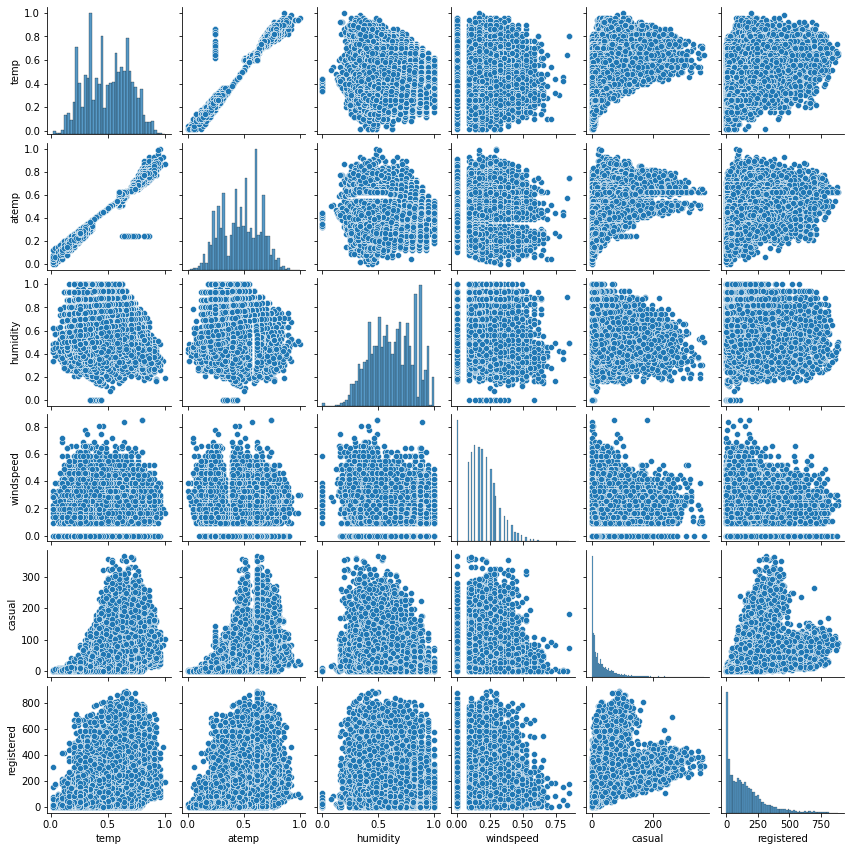

In [162]:
sns.pairplot(df, vars=['temp','atemp','humidity','windspeed','casual','registered'],aspect=1,size=2)
plt.show()

From above graphs we can say that temp and atemp have a relationship

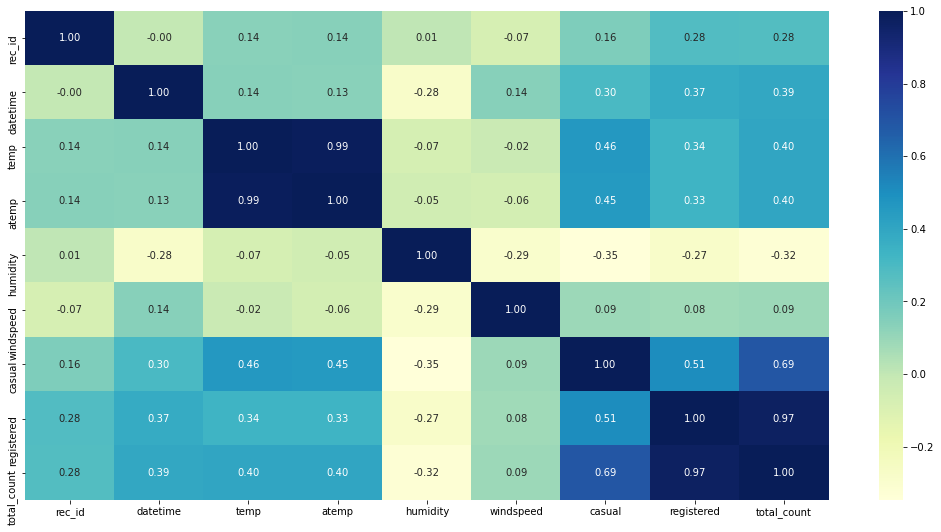

In [163]:
#Correlations Using Heatmap
plt.figure(figsize=(18,9))
sns.heatmap(df.corr()[:15],annot=True,cmap='YlGnBu',fmt='.2f')
plt.show()

In [164]:
df=df.drop(['atemp'],axis=1)

<AxesSubplot:xlabel='humidity', ylabel='total_count'>

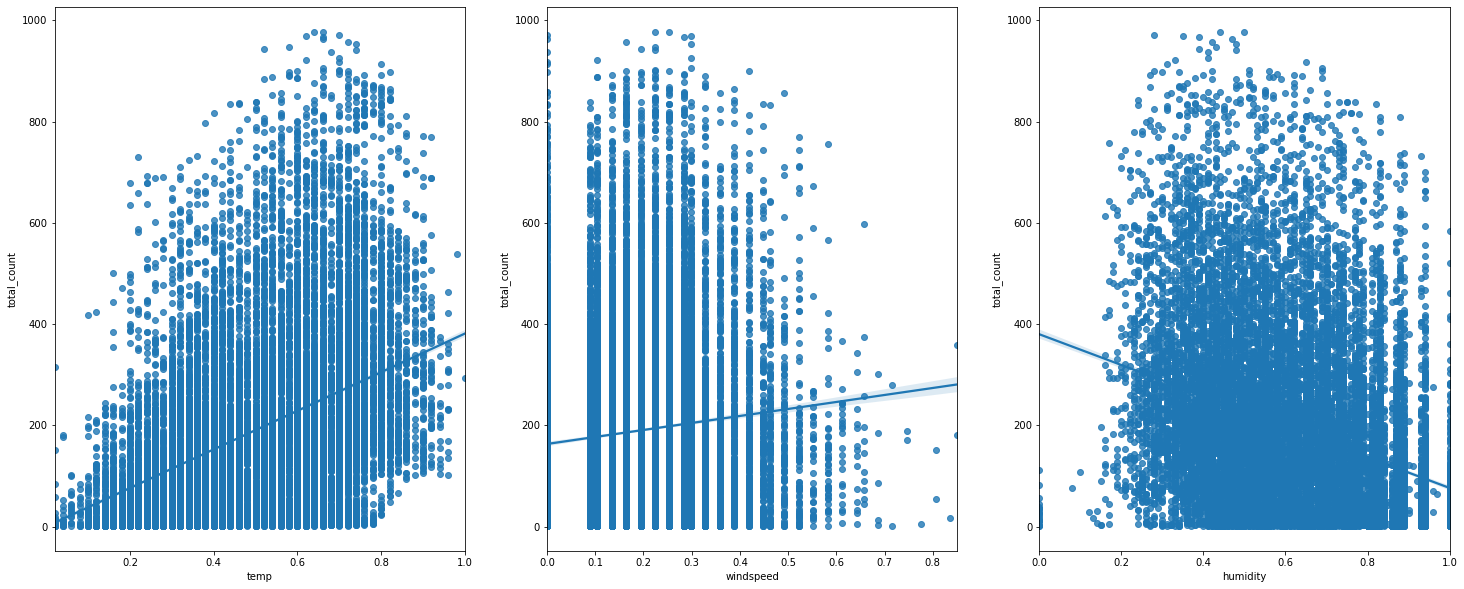

In [165]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(25, 10)
sns.regplot(x="temp", y="total_count", data=df,ax=ax1)
sns.regplot(x="windspeed", y="total_count", data=df,ax=ax2)
sns.regplot(x="humidity", y="total_count", data=df,ax=ax3)

In [166]:
#sns.boxplot(df['temp']);

In [167]:
#sns.boxplot(df['atemp']);

In [168]:
#sns.boxplot(df['humidity'])

In [169]:
#sns.boxplot(df['windspeed']);

In [170]:
#def outliers(df, ft):
#    Q1 = df[ft].quantile(0.25)
#    Q3 = df[ft].quantile(0.75)
 #   IQR = Q3-Q1
 #   
  #  lower_limit = Q1-1.5*IQR
   # upper_limit = Q3+1.5*IQR
    
    #ls = df.index[ (df[ft] <lower_limit) | (df[ft] >upper_limit)]
    
   # return ls

In [171]:
#index_list = []
#for feature in ['humidity','windspeed']:
   # index_list.extend(outliers(df, feature))

In [172]:
#index_list

In [173]:
#def remove(df, ls):
#    ls = sorted(set(ls))
#    df = df.drop(ls)
 #   return df 

In [174]:
#df_cleand = remove(df, index_list)

In [175]:
#df_cleand.shape

In [176]:
#sns.boxplot(df_cleand['windspeed']);

In [177]:
#sns.boxplot(df_cleand['humidity']);

In [178]:
# Confirming dtypes of above catogrical columns 

df["month"]=df.month.astype("object")
df['season']=df['season'].astype(object)
df['weather_condition']=df['weather_condition'].astype(object)
df['weekday']=df['weekday'].astype(object)
df['year']=df['year'].astype(object)
df['hour']=df['hour'].astype(object)
df['holiday']=df['holiday'].astype(object)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   rec_id             17379 non-null  int64   
 1   datetime           17379 non-null  float64 
 2   season             17379 non-null  object  
 3   year               17379 non-null  object  
 4   month              17379 non-null  object  
 5   hour               17379 non-null  object  
 6   holiday            17379 non-null  object  
 7   weekday            17379 non-null  object  
 8   workingday         17379 non-null  category
 9   weather_condition  17379 non-null  object  
 10  temp               17379 non-null  float64 
 11  humidity           17379 non-null  float64 
 12  windspeed          17379 non-null  float64 
 13  casual             17379 non-null  int64   
 14  registered         17379 non-null  int64   
 15  total_count        17379 non-null  int64   
dtypes: c

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

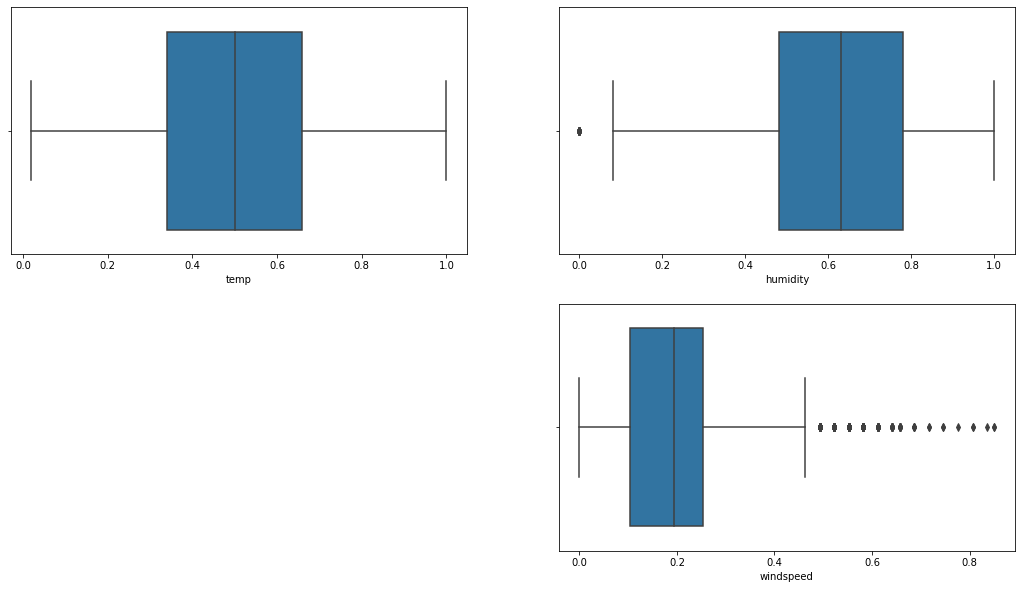

In [180]:
#univaraite analysis on numerical columns
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(df['temp'])
plt.subplot(2,2,2)
sns.boxplot(df['humidity'])
plt.subplot(2,2,4)
sns.boxplot(df['windspeed'])
plt.show()

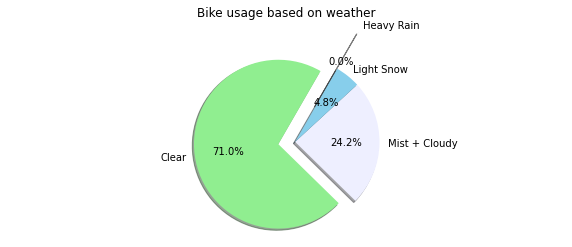

In [181]:
#finding the most bike usage based on weather
plt.figure(figsize=(10, 4))

labels = 'Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'
sizes = df.total_count.groupby(df.weather_condition).sum().tolist()
colors = ['lightgreen', '#eeefff', 'skyblue', 'black']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()

In [182]:
# #Creating dummy dataframes
type_season=pd.get_dummies(df['season'],drop_first=True)
weath_type=pd.get_dummies(df['weather_condition'],drop_first=True)
day_type=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['month'],drop_first=True)

In [183]:
df=pd.concat([df,type_season],axis=1)
df=pd.concat([df,weath_type],axis=1)
df=pd.concat([df,day_type],axis=1)
df=pd.concat([df,Month],axis=1)

df.iloc[1:,11:]

,humidity,windspeed,casual,registered,total_count,2,3,4,2,3,...,3,4,5,6,7,8,9,10,11,12
1,0.80,0.0000,8,32,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.80,0.0000,5,27,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.75,0.0000,3,10,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.75,0.0000,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.75,0.0896,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.60,0.1642,11,108,119,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17375,0.60,0.1642,8,81,89,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17376,0.60,0.1642,7,83,90,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17377,0.56,0.1343,13,48,61,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [202]:
#df.drop(['season'],axis=1,inplace=True)
#df.drop(['weather_condition'],axis=1,inplace=True)
#df.drop(['weekday'],axis=1,inplace=True)
#df.drop(['month'],axis=1,inplace=True)

In [203]:
#df.info()

In [188]:
df.head()

,rec_id,datetime,year,hour,holiday,workingday,temp,humidity,windspeed,casual,...,3,4,5,6,7,8,9,10,11,12
0,1,0.0,0,0,0,0,0.24,0.81,0.0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,1,0,0,0.22,0.80,0.0,8,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,0,2,0,0,0.22,0.80,0.0,5,...,0,0,0,0,0,0,0,0,0,0
3,4,3.0,0,3,0,0,0.24,0.75,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,5,4.0,0,4,0,0,0.24,0.75,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
df.describe()

,rec_id,datetime,temp,humidity,windspeed,casual,registered,total_count,2,3,...,3,4,5,6,7,8,9,10,11,12
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088,0.253697,0.258703,...,0.084757,0.082686,0.085621,0.082859,0.085621,0.084873,0.082686,0.083492,0.082686,0.085333
std,5017.0295,6.914405,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599,0.435139,0.437935,...,0.278528,0.275415,0.279811,0.275676,0.279811,0.278700,0.275415,0.276632,0.275415,0.279384
min,1.0000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,6.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8690.0000,12.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13034.5000,18.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17379.0000,23.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
df.shape

(17379, 35)

# Splitting the Data into Training and Testing Sets

In [191]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [192]:
df_train.head()

,rec_id,datetime,year,hour,holiday,workingday,temp,humidity,windspeed,casual,...,3,4,5,6,7,8,9,10,11,12
8364,8365,4.0,0,4,0,1,0.36,0.53,0.1045,0,...,0,0,0,0,0,0,0,0,0,1
643,644,2.0,0,2,0,0,0.16,0.80,0.0000,1,...,0,0,0,0,0,0,0,0,0,0
9518,9519,13.0,1,13,0,1,0.38,0.40,0.2239,17,...,0,0,0,0,0,0,0,0,0,0
7233,7234,0.0,0,0,0,1,0.36,0.76,0.0896,3,...,0,0,0,0,0,0,0,0,1,0
7443,7444,18.0,0,18,1,0,0.34,0.39,0.2537,23,...,0,0,0,0,0,0,0,0,1,0


In [193]:
df_test.head()

,rec_id,datetime,year,hour,holiday,workingday,temp,humidity,windspeed,casual,...,3,4,5,6,7,8,9,10,11,12
6052,6053,18.0,0,18,0,1,0.72,0.62,0.1642,83,...,0,0,0,0,0,0,1,0,0,0
6250,6251,0.0,0,0,0,1,0.62,0.94,0.0896,11,...,0,0,0,0,0,0,1,0,0,0
8110,8111,14.0,0,14,0,1,0.38,0.46,0.2836,24,...,0,0,0,0,0,0,0,0,0,1
7604,7605,11.0,0,11,0,1,0.30,0.36,0.1343,18,...,0,0,0,0,0,0,0,0,1,0
6356,6357,10.0,0,10,0,1,0.64,0.94,0.1642,21,...,0,0,0,0,0,0,1,0,0,0


In [194]:
scaler = MinMaxScaler()

In [195]:
num_vars=['temp','humidity','windspeed','total_count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-195-4ccf52d812c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [204]:
#df_train.info()

In [197]:
df_train.describe()

,rec_id,datetime,temp,humidity,windspeed,casual,registered,total_count,2,3,...,3,4,5,6,7,8,9,10,11,12
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,...,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,8699.534484,11.562433,0.499187,0.627601,0.222199,36.212824,154.288039,0.194161,0.254501,0.261241,...,0.086313,0.082367,0.084916,0.083683,0.087135,0.086313,0.083272,0.082614,0.085327,0.084176
std,5001.994294,6.902286,0.200417,0.193206,0.142875,49.995444,151.137171,0.186013,0.435598,0.439329,...,0.280838,0.274935,0.278768,0.276923,0.282045,0.280838,0.276304,0.275309,0.279379,0.277663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4390.000000,6.000000,0.333333,0.480000,0.122840,4.000000,34.000000,0.039959,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8656.000000,12.000000,0.500000,0.630000,0.228047,17.000000,116.000000,0.145492,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13036.000000,18.000000,0.666667,0.780000,0.298225,49.000000,222.000000,0.288934,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17379.000000,23.000000,1.000000,1.000000,1.000000,362.000000,886.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
df_test.describe()

,rec_id,datetime,temp,humidity,windspeed,casual,registered,total_count,2,3,...,3,4,5,6,7,8,9,10,11,12
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,...,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,8667.754699,11.510165,0.491780,0.626360,0.192600,34.424242,152.617568,187.041811,0.251822,0.252781,...,0.081128,0.083429,0.087265,0.080936,0.082087,0.081511,0.081320,0.085539,0.076525,0.088032
std,5052.346468,6.943124,0.192838,0.192299,0.124154,47.636527,151.877697,181.004690,0.434101,0.434648,...,0.273057,0.276556,0.282250,0.272763,0.274523,0.273645,0.273351,0.279709,0.265861,0.283369
min,2.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4268.500000,5.000000,0.340000,0.472500,0.104500,4.000000,33.250000,39.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8764.000000,12.000000,0.500000,0.630000,0.194000,16.000000,114.000000,140.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13028.000000,17.000000,0.640000,0.780000,0.283600,47.000000,217.000000,274.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17371.000000,23.000000,1.000000,1.000000,0.850700,367.000000,876.000000,970.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
y_train = df_train.pop('total_count')
X_train = df_train

In [200]:
# Selecting Top 15 features for model 

ln = LinearRegression()
ln.fit(X_train, y_train)

RFE = RFE(ln, 10)            
RFE = RFE.fit(X_train, y_train)

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [205]:
list(zip(X_train.columns,RFE.support_,RFE.ranking_))

[('rec_id', True, 1),
 ('datetime', False, 20),
 ('year', True, 1),
 ('hour', False, 17),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', False, 6),
 ('humidity', True, 1),
 ('windspeed', False, 8),
 ('casual', True, 1),
 ('registered', True, 1),
 (2, True, 1),
 (3, True, 1),
 (4, False, 25),
 (2, False, 9),
 (3, False, 10),
 (4, False, 21),
 (1, False, 12),
 (2, False, 16),
 (3, False, 18),
 (4, False, 15),
 (5, False, 24),
 (6, False, 11),
 (2, False, 23),
 (3, False, 13),
 (4, False, 19),
 (5, False, 22),
 (6, False, 7),
 (7, True, 1),
 (8, True, 1),
 (9, False, 2),
 (10, False, 3),
 (11, False, 4),
 (12, False, 5)]

In [206]:
top_10 = X_train.columns[RFE.support_]
top_10

Index(['rec_id', 'year', 'holiday', 'humidity', 'casual', 'registered', 2, 3,
       7, 8],
      dtype='object')

In [207]:
# Droping columns not firt for building model as per RFE 
X_train.columns[~RFE.support_]

Index([  'datetime',       'hour', 'workingday',       'temp',  'windspeed',
                  4,            2,            3,            4,            1,
                  2,            3,            4,            5,            6,
                  2,            3,            4,            5,            6,
                  9,           10,           11,           12],
      dtype='object')

In [208]:
X_train_RFE = X_train[top_10]

In [209]:
X_train_lm = sm.add_constant(X_train_RFE)
ln =sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [210]:
ln.params   #cheking parameters (beta coeeficients)

const        -1.024590e-03
rec_id       -2.964615e-20
year         -2.515349e-17
holiday       8.196568e-17
humidity      5.204170e-18
casual        1.024590e-03
registered    1.024590e-03
2             1.127570e-17
2             2.602085e-17
2            -1.734723e-17
2             2.688821e-17
3             1.214306e-17
3             1.734723e-18
3            -3.035766e-18
3            -4.683753e-17
7             1.474515e-17
8             2.992398e-17
dtype: float64

In [211]:
ln.summary()  #checking model summary 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.542e+32
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:44:19   Log-Likelihood:             4.1367e+05
No. Observations:               12165   AIC:                        -8.273e+05
Df Residuals:                   12148   BIC:                        -8.272e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010   1.93e-17  -5.32e+13      0.000      -0.001      -0.001
rec_id     -2.965e-20   2.03e-21    -14.577      0.000   -3.36e-20   -2.57e-20
year       -2.515e-17   1.91e-17     -1.315      0.188   -6.26e-17    1.23e-17
holiday     8.197e-17   2.26e-17      3.625      0.000    3.76e-17    1.26e-16
humidity    5.204e-18   2.36e-17      0.220      0.826   -4.11e-17    5.15e-17
casual         0.0010   9.53e-20   1.08e+16      0.000       0.001       0.001
registered     0.0010   3.04e-20   3.37e+16      0.000       0.001       0.001
2           1.128e-17   1.09e-17      1.033      0.302   -1.01e-17    3.27e-17
2           2.602e-17   9.13e-18      2.851      0.004    8.13e-18    4.39e-17
2          -1.735e-17   1.11e-17     -1.567      0.117    -3.9e-17    4.35e-18
2           2.689e-17   1.76e-17      1.525      0.127   -7.66e-18    6.14e-17
3           1.214e-17   1.43e-17      0.848      0.397   -1.59e-17    4.02e-17
3           1.735e-18   1.51e-17      0.115      0.909   -2.79e-17    3.14e-17
3          -3.036e-18   1.11e-17     -0.273      0.785   -2.49e-17    1.88e-17
3          -4.684e-17   1.51e-17     -3.110      0.002   -7.64e-17   -1.73e-17
7           1.475e-17    1.8e-17      0.818      0.413   -2.06e-17    5.01e-17
8           2.992e-17    1.8e-17      1.664      0.096   -5.32e-18    6.52e-17
==============================================================================
Omnibus:                      989.893   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.775
Skew:                           0.732   Prob(JB):                    1.38e-275
Kurtosis:                       3.593   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model building and Feature Selection using VIF

In [215]:
# Importing VIF from Sklearn 


VIF = pd.DataFrame()

X = X_train_RFE.astype(float)                                    

VIF['Features'] = X.columns                                       

VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

VIF['VIF'] = round(VIF['VIF'], 2)

VIF = VIF.sort_values(by = "VIF", ascending = False)

VIF

,Features,VIF
0,rec_id,23.82
1,year,11.54
3,humidity,9.15
10,3,3.80
5,registered,3.00
4,casual,2.36
14,7,2.00
15,8,1.99
6,2,1.92
7,2,1.56


# Column "rec_id" has very high significance which is good indication but it has also high VIF which is not good that means its higly correlated to other indipendent variables , so we have to drop it as it causing multicollinearity not good for our model

In [217]:

X_train_RFE=X_train_RFE.drop(['rec_id'],axis=1)



print("Summary after dropping 'rec_id'")


print("")
print("")


X_train_lm = sm.add_constant(X_train_RFE)
ln1 = sm.OLS(y_train,X_train_lm.astype(float)).fit()  
print(ln1.summary())


print("")
print("")

print("VIF after dropping 'rec_id'")

print("")
print("")


VIF = pd.DataFrame()
X = X_train_RFE.astype(float)                                     
VIF['Features'] = X.columns                                       
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

Summary after dropping 'rec_id'


                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.180e+32
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:04:18   Log-Likelihood:             4.2342e+05
No. Observations:               12165   AIC:                        -8.468e+05
Df Residuals:                   12149   BIC:                        -8.467e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0

In [218]:
X_train_RFE=X_train_RFE.drop(['humidity'],axis=1)



print("Summary after dropping 'humidity'")


print("")
print("")


X_train_lm = sm.add_constant(X_train_RFE)
ln2 = sm.OLS(y_train,X_train_lm.astype(float)).fit()  
print(ln2.summary())


print("")
print("")

print("VIF after dropping 'humidity'")

print("")
print("")


VIF = pd.DataFrame()
X = X_train_RFE.astype(float)                                     
VIF['Features'] = X.columns                                       
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

Summary after dropping 'humidity'


                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.243e+32
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:05:39   Log-Likelihood:             4.2226e+05
No. Observations:               12165   AIC:                        -8.445e+05
Df Residuals:                   12150   BIC:                        -8.444e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0

In [219]:
y_train_pred = ln2.predict(X_train_lm)

res=y_train - y_train_pred


/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Errors')

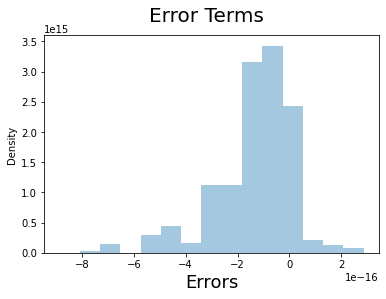

In [220]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

# Making Predictions Using the Final Model

#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final 10th model

In [223]:
num_vars=['temp','humidity','year','holiday']

df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-223-102d5fc27561>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [224]:
df_test.describe()

,rec_id,datetime,year,holiday,temp,humidity,windspeed,casual,registered,total_count,...,3,4,5,6,7,8,9,10,11,12
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,...,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,8667.754699,11.510165,0.595642,-0.000995,0.491437,0.626360,0.192600,34.424242,152.617568,187.041811,...,0.081128,0.083429,0.087265,0.080936,0.082087,0.081511,0.081320,0.085539,0.076525,0.088032
std,5052.346468,6.943124,0.587755,0.000171,0.200873,0.192299,0.124154,47.636527,151.877697,181.004690,...,0.273057,0.276556,0.282250,0.272763,0.274523,0.273645,0.273351,0.279709,0.265861,0.283369
min,2.000000,0.000000,0.000000,-0.001025,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4268.500000,5.000000,0.000000,-0.001025,0.333333,0.472500,0.104500,4.000000,33.250000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8764.000000,12.000000,1.175503,-0.001025,0.500000,0.630000,0.194000,16.000000,114.000000,140.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13028.000000,17.000000,1.175503,-0.001025,0.645833,0.780000,0.283600,47.000000,217.000000,274.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17371.000000,23.000000,1.175503,0.000000,1.020833,1.000000,0.850700,367.000000,876.000000,970.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
# Dividing into X_test and y_test
y_test = df_test.pop('total_count')
X_test = df_test

In [227]:
X_train_lm = X_train_lm.drop(['const'], axis=1)         # droping constant from training data set  


X_test_RFE= X_test[X_train_lm.columns]                  # Adding all significant columns to test data set 



X_test_lm=sm.add_constant(X_test_RFE)                   #adding constant to test dat dset 

In [229]:
#y_test_pred = ln2.predict(X_test_lm)

In [177]:
#x_train = df_train.drop(columns=["temp", "datetime", "casual", "registered"]).values

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


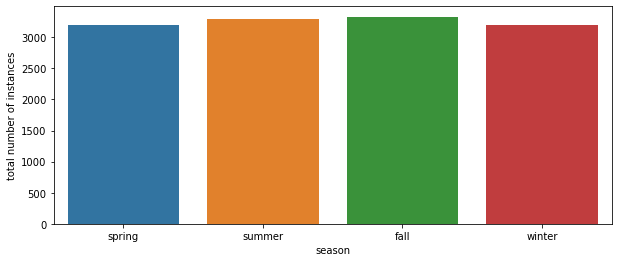

In [186]:
seasons = ['spring', 'summer', 'fall', 'winter']
# Let's check if the data is skewed / biased towards any given season

plt.figure(figsize=(10, 4))
ax = sns.countplot('season', data=df_train)
ax.set_xticklabels(seasons)
ax.set_ylabel('total number of instances')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


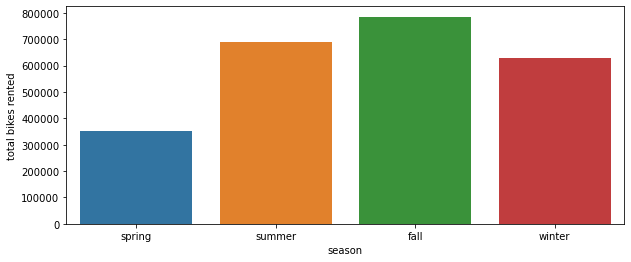

In [189]:
#demand in seasons
plt.figure(figsize=(10, 4))

ax = sns.barplot('season', 'total_count', data=df_train, estimator=sum, ci=None)
ax.set_xticklabels(seasons)
ax.set_ylabel('total bikes rented')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


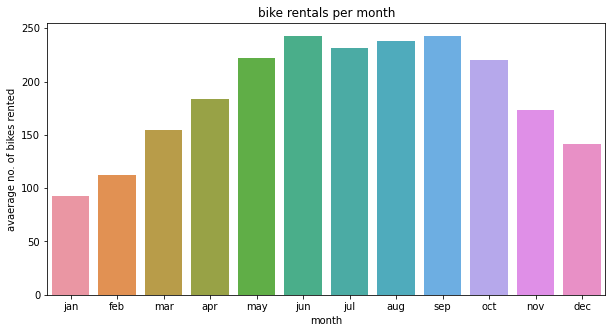

In [190]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
plt.figure(figsize=(10, 5))
ax = sns.barplot('month', 'total_count', data=df_train, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


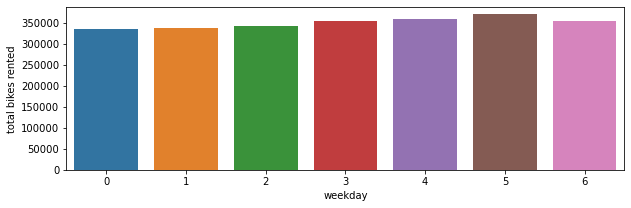

In [203]:
plt.figure(figsize=(10, 3))
ax = sns.barplot('weekday', 'total_count', data=df_train, estimator=sum, ci=None)

ax.set_ylabel('total bikes rented')
ax.set_xlabel('weekday')

plt.show()

/Users/qabas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


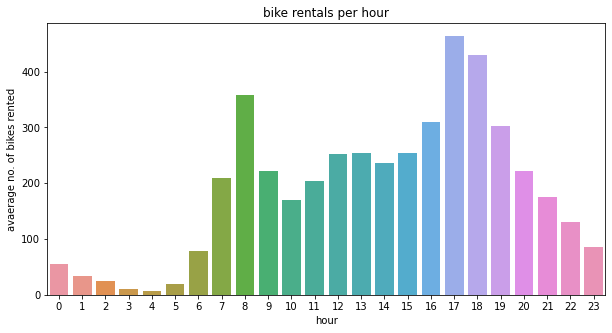

In [214]:
#months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
plt.figure(figsize=(10, 5))
ax = sns.barplot('hour', 'total_count', data=df_train, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('hour')

plt.title('bike rentals per hour')

plt.show()

In [216]:
#plt.figure(figsize=(9, 10))

#labels = list(range(24))
#sizes = df_train.total_count.groupby(df_train.hour).sum().tolist()
# colors = ['gold', '#eeefff', 'white', 'black']
#explode = np.zeros(24)
#explode[17] = 0.15
#explode[18] = 0.1

#plt.pie(sizes, labels=labels, shadow=True, startangle=90, pctdistance=.9, explode=explode,
       # autopct='%1.1f%%',  counterclock=False, labeldistance=1.04)

# Set aspect ratio to be equal so that pie is drawn as a circle.
#plt.axis('equal')
#plt.title('Hourly bike usage')
#plt.show()